# Introduction to Neural Networks

## Lecture plan

- Why study neural networks? The **"deep learning" revolution**.
- A brief **history** of neural networks.
   - Artificial neurons and perceptrons.
   - The X-OR problem and **non-linear separability**.
   - Solving X-OR with **hidden layers**.
- Modern "deep nets".

## Why study neural networks?

> An **artificial neural network (ANN)** is a predictive model inspired by the structure and function of biological neural networks.

- Neural networks are foundational to modern machine learning and AI.
   - Large Language Models (LLMs) like ChatGPT are neural networks.
   - Self-driving cars, face recognition, etc., are also built using neural networks.
- **"Deep learning"** = really big neural networks.

### Impressive "black boxes"

- Modern neural networks are undeniably impressive.
   - E.g., LLMs are incredibly powerful.
- These systems are also **"black boxes"**.

> Advances in the *performance* of neural networks (like LLMs) have outpaced our *understanding* of those systems.

- As computational social scientists, our goal isn't (just) to **engineer** powerful systems.
- We also want to *understand* them——and understand their impact on society.

## Neural networks: an abridged history

> The history of neural networks is intertwined with the history of Cognitive Science, Neuroscience, and Computer Science.

- In 1943, the first *artificial neuron* was characterized mathematically.
- We've come a long way since then!
- In this section, we'll dive into the details of that history.
   - Understanding the history will also shed light on **current debates** and **applications**.

### Bioloigcal neurons: an inspiration

> **Neurons** are the primary cells of the nervous system, e.g., the brain. 

- In 1940s, advances in **neurophysiology** had led to better understand of **neurons** and how they work.
- Key insights:
   - Neurons are *connected* to each other via **synapses**.
   - These synapses allow neurons to "send signals" to each other. 
   - Inputs from one neuron neuron to another can cause the second neuron to **fire**.
       - This is a **categorical** ("all-or-none") process.
   - The connections ("weights") between neurons vary in strength.

<img src="img/real_neuron.png" width="300" alt="Neuron illustration">



### The first artificial neuron

> The first **artificial neuron** was described in 1943 by Walter Pitts and Warren McCulloch.

- **Goal**: Using basic structure of biological neuron, build a system that can calculate logical functions (`or` and `and`).
- Basic structure:
   - Two inputs: $X_1$ and $X_2$.
   - Aggregate (e.g., sum) inputs using function $g$.
   - Apply some **decision threshold** $f$: to fire, or not to fire?

<img src="img/art_neuron.png" width="300" alt="Artificial neuron illustration">



### Artificial neurons as logic gates

- Pitts and McCulloch shows that these artificial neurons could function as *logic gates*.
- E.g., this formulation functions as an `or` gate.

<img src="img/or_gate.png" width="300" alt="Artificial neuron illustration">


#### Check-in

Can you implement a simple `or_gate` function? It should take in two inputs `x1` and `x2`, sum those inputs, and then return `1` if the sum is `>= 1`, and `0` otherwise.

In [6]:
### Your code here

#### A simple `or_gate`

**Note**: Python already effectively implements this with `or`!

In [7]:
def or_gate(x1, x2):
    sum = x1 + x2
    if sum >= 1:
        return 1
    return 0

In [8]:
or_gate(1, 0)

1

In [9]:
or_gate(0, 1)

1

In [4]:
or_gate(0, 0)

0

### Learning from data

- In the 1950s, Frank Rosenblatt improved upon this first artificial neuron with the **perceptron**.
- Using **supervised learning**, the perceptron updated *weights* from its inputs to outputs.
- Aggregation function: $\sum_i^nx_iw_i + b$, where $b$ is a general "bias" term.
    - This formula is basically the linear equation!
- Decision function: Pass output of $g$ through some **filter** to decide whether to fire.

<img src="img/perceptron.png" width="300" alt="Perceptron">


#### Learning in action: a simple perceptron

> To illustrate **learning**, let's consider a simple case of a single input $x_1$ and single weight $w_1$.

- Suppose we have **training data** $X$ and $Y$.
- We want to find a value for $w_1$ that allows us to predict $Y$ from $X$.

<img src="img/single_weight.png" width="300" alt="Perceptron with a single weight">


#### A simple linear relationship

- In this example, $X$ and $Y$ have a perfect linear relationship.
- We can try out different values of $w_1$ and see which generates the least **prediction error**.

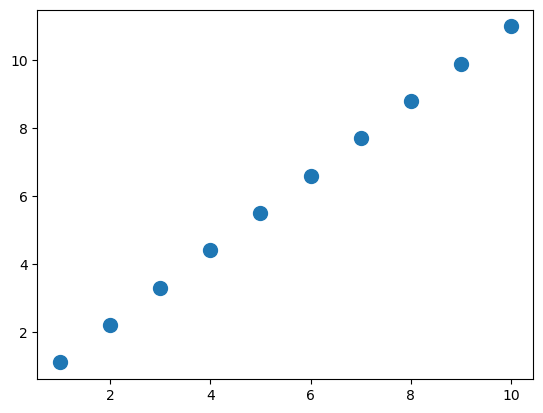

In [53]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(1, 10, 10)
y = x * 1.1
plt.scatter(x, y, s = 100)

#### Check-in: trying different weights

Try a few different values of $w_1$, e.g., `[0, .5, 1, 1.5, 2]` and see how their predictions compare.

In [57]:
### Your code here

#### A quick implementation

Based on this plot, the weight of `1` is closest, though not perfect. Good enough for now!

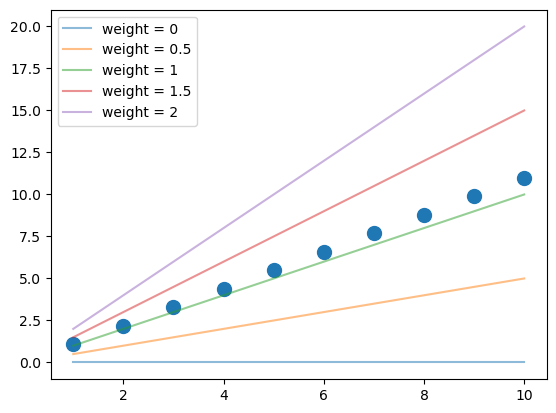

In [58]:
weights = [0, .5, 1, 1.5, 2]
plt.scatter(x, y, s = 100)
for w in weights:
    y_pred = x * w
    plt.plot(x, y_pred, alpha = .5, label = "weight = {w}".format(w=w))
plt.legend()

### Lots of excitement

- There was *lots* of excitement following the announcement of Rosenblatt's perceptron.
- It was an example of a system **"learning from experience"**.
  - In reality, it wasn't all that different from linear regression or other statistical models.
  - But because it was inspired by the brain (loosely), people thought it had more promise.

A press release announced:

> “…the Navy revealed the embryo of an electronic computer today that it expects will be able to walk, talk, see, write, reproduce itself and be conscious of its existence…”  

But the excitement didn't last forever!


### The X-OR Problem

- In the 1960s, researchers like Marvin Minsky showed that a simple perceptron *could not* implement certain functions, like X-OR.
- These functions are **non-linearly separable** (see lecture on SVMs!).

<img src="img/xor.png" width="300" alt="Perceptron">

#### Implementing `xor` in Python

- `xor` is a **non-linearly separable** function.
- Basic intuition: return `1` if `x1` and `x2` are not the same, return `0` if they are the same. 

In [27]:
def xor(x1, x2):
    if x1 == 0 and x2 == 1:
        return True
    if x1 == 1 and x2 == 0:
        return True
    return False

In [28]:
xor(1, 0)

True

In [29]:
xor(1, 1)

False

### Why X-OR was a problem

- Neural networks were initially presented as systems that could **learn** to implement various functions.
- But `xor` is not a particularly complex function——it's just not linearly separable.
- If neural networks couldn't learn `xor`, there's probably lots of other stuff they couldn't learn too.
- This destroyed interest in neural networks for a few decades, leading to the first ["AI winter"](https://en.wikipedia.org/wiki/AI_winter).

### Hidden layers to the rescue!

> Adding **"hidden layers"** between the *input* and *output* enables neural networks to learn non-linearly separable problems.

- This was known even in the 1960s, but was too hard to implement.
- Techniques like [backpropagation](https://en.wikipedia.org/wiki/Backpropagation) were invented in the 1980s, which made it more *computationally tractable*. 

<img src="img/hidden_layers.png" width="300" alt="Hidden layers">

### Why do hidden layers work?

> A **hidden layer** adds new *parameters* to a neural network, which expands the space of features (and relationships) the system can learn.

- Similar intuition as a **non-linear kernel trick** for SVM.
- Also similar to **polynomial regression**.


<img src="img/networks/nn1.png" width="300" alt="Larger model">

## Modern "deep nets"

> The term **"deep learning"** refers to neural networks with multiple hidden layers (and lots of **hidden units** in each layer).

There have been may advances since the 1980s.

- New **architectures**: RNNs, Transformers, etc.
- Better **compute**, e.g., Moore's Law.
- More **data** for training.
- The use of **GPUs** for model training.

### Even bigger models

Modern neural networks have many layers (often more than depicted here!).

<img src="img/networks/nn3.png" width="300" alt="Larger model">

### Novel architectures

Researchers have also created new **architectures**, like recurrent neural networks. (We'll discuss these in more detail soon!)

<img src="img/networks/rnn.webp" width="500" alt="Larger model">

## Key takeaways and wrap-up

- Neural networks are ultimately a kind of **predictive model**.
- A simple artificial neuron (perceptron) consists of **weights**, an **aggregation function**, and a **decision function**.
    - "Weights" are similar to *coefficients* in linear regression!
- Modern deep neural networks are much more **complex**.
    - "Deep" = many *layers*.
- Moving forward, we'll talk about:
   - Building and training neural networks in Python using `pytorch`.
   - Some of the **design considerations** regarding neural networks.
   - Neural networks trained on language data, i.e., *large language models*.